In [1]:
import pymeasure
from pymeasure.instruments.srs import SR830
import numpy as np
import pandas as pd
from time import sleep
import matplotlib.pyplot as plt

In [2]:
sourcemeter = SR830('GPIB::9')
sourcemeter.id

'Stanford_Research_Systems,SR830,s/n81851,ver1.07'

Initialize parameters and input DC voltage parameters

In [3]:
data_points = 100
field_voltage_slope = 192.38 # (mT/V)
max_field = 1000 # (mT)
min_field = -max_field
# max_voltage = 0.2 # (V)
# min_voltage = -max_voltage
sourcemeter.harmonic = 1
filename = 'Au_Si_1T field 27.7mV QWP1 no analyzer offset Vin.dat'
V_DC = 27.7E-3 # DC voltage read from multimeter
#repeat = 50

In [4]:
loop1 = np.linspace(min_field, max_field, num=data_points)
# loop2 = np.linspace(max_field, min_field, num=data_points)
# fields = np.concatenate((loop1, loop2))
fields = loop1
voltages = fields / field_voltage_slope 
Vin = np.zeros_like(voltages)

Loop over field and measure in-phase signal

In [7]:
# repeat = 4
for i in range(len(fields)):
    sourcemeter.aux_out_1 = voltages[i]
    sleep(0.5)
#     repeatSum = 0
#     for j in range(repeat):
#         repeatSum += sourcemeter.x
#         sleep(0.3)
    Vin[i] = sourcemeter.x
#     Vin[i] = repeatSum/repeat
sourcemeter.aux_out_1 = 0

# Kerr = Vin/V_DC/2/0.7

(-0.25, 0.35)

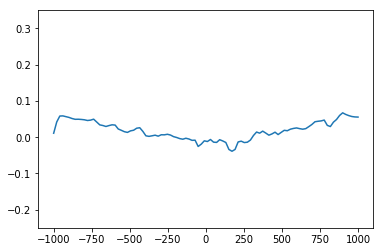

In [8]:
Kerr = Vin/V_DC/2/0.7
plt.plot(fields, Kerr*1e3)
plt.ylim(-0.25, 0.35)

In [9]:
data = pd.DataFrame({
    'Field (mT)': fields,
    'V_in (V)': Vin})
data.to_csv(filename)

In [182]:
Vin/1E-6

array([-1.40817, -1.45287, -1.48267, -1.52738, -1.57953, -1.59443,
       -1.52738, -1.47522, -1.46032, -1.45287, -1.43052, -1.42307,
       -1.44542, -1.46032, -1.45287, -1.43797, -1.44542, -1.43797,
       -1.43052, -1.43052, -1.41562, -1.40072, -1.38582, -1.37836,
       -1.37836, -1.39327, -1.44542, -1.42307, -1.42307, -1.40817,
       -1.39327, -1.37836, -1.34856, -1.34111, -1.34856, -1.37091,
       -1.39327, -1.40072, -1.40817, -1.42307, -1.42307, -1.40072,
       -1.39327, -1.37091, -1.34856, -1.33366, -1.31131, -1.31131,
       -1.35601, -1.37091, -1.36346, -1.37091, -1.37836, -1.35601,
       -1.35601, -1.36346, -1.37091, -1.39327, -1.40072, -1.39327,
       -1.37836, -1.35601, -1.34856, -1.36346, -1.37091, -1.37091,
       -1.35601, -1.37836, -1.38582, -1.37836, -1.38582, -1.40072,
       -1.41562, -1.43052, -1.43052, -1.43052, -1.43797, -1.43797,
       -1.43797, -1.43797, -1.43052, -1.42307, -1.41562, -1.41562,
       -1.43797, -1.45287, -1.46777, -1.49012, -1.48267, -1.47

(-0.3, -0.2)

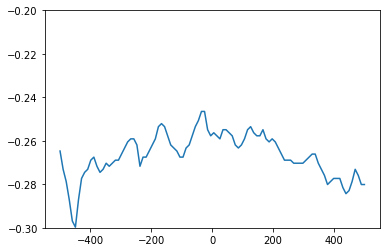

In [185]:
Kerr = Vin/V_DC/2/0.7
plt.plot(fields, Kerr*1000)
plt.ylim(-0.3, -0.2)

In [128]:
Kerr*1000

array([-2.60681598, -2.60636804, -2.60613801, -2.60658596, -2.60590799,
       -2.60569007, -2.60456416, -2.60681598, -2.607046  , -2.60546005,
       -2.60524213, -2.6038862 , -2.60320823, -2.60433414, -2.60343826,
       -2.60456416, -2.60433414, -2.60478208, -2.60524213, -2.60456416,
       -2.60501211, -2.60478208, -2.60524213, -2.607046  , -2.60681598,
       -2.60613801, -2.60636804, -2.60613801, -2.60636804, -2.60681598,
       -2.60749395, -2.607046  , -2.60546005, -2.60546005, -2.60613801,
       -2.60613801, -2.60524213, -2.60546005, -2.60569007, -2.60590799,
       -2.60613801, -2.60524213, -2.6038862 , -2.60365617, -2.60524213,
       -2.60456416, -2.60297821, -2.60208232, -2.60276029, -2.60320823,
       -2.60433414, -2.60320823, -2.60410412, -2.60320823, -2.60297821,
       -2.60230024, -2.6018523 , -2.60117433, -2.60208232, -2.60230024,
       -2.60297821, -2.6038862 , -2.60343826, -2.60320823, -2.60501211,
       -2.60636804, -2.60546005, -2.60524213, -2.60546005, -2.60

The std of Kerr angle is 0.5mrad. The sensitivity is 0.3s. The noise is 0.25 mrad/sqrt(Hz)

In [176]:
np.std(Kerr)

0.00020655186712730415